In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_model_revised
from models.energy import energy_baseline
from models.energy import energy_LSTM, energy_XGBoost

In [2]:
# Load data
energy = get_energy.get()

  0%|          | 0/264 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 264/264 [00:27<00:00,  9.62it/s]


In [3]:
energy

,gesamt,weekday
date_time,,
2018-12-24 00:00:00,42.02925,0
2018-12-24 01:00:00,39.61025,0
2018-12-24 02:00:00,39.13875,0
2018-12-24 03:00:00,39.42100,0
2018-12-24 04:00:00,40.74775,0
...,...,...
2024-01-12 12:00:00,71.27725,4
2024-01-12 13:00:00,69.86600,4
2024-01-12 14:00:00,68.25350,4


In [4]:
baseline_model = {
    'name': 'Baseline Model',
    'function': energy_baseline.energy_baseline
}
XGB_model = {
    'name': 'Energy LSTM',
    'function': energy_XGBoost.energy_forecast
}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is t

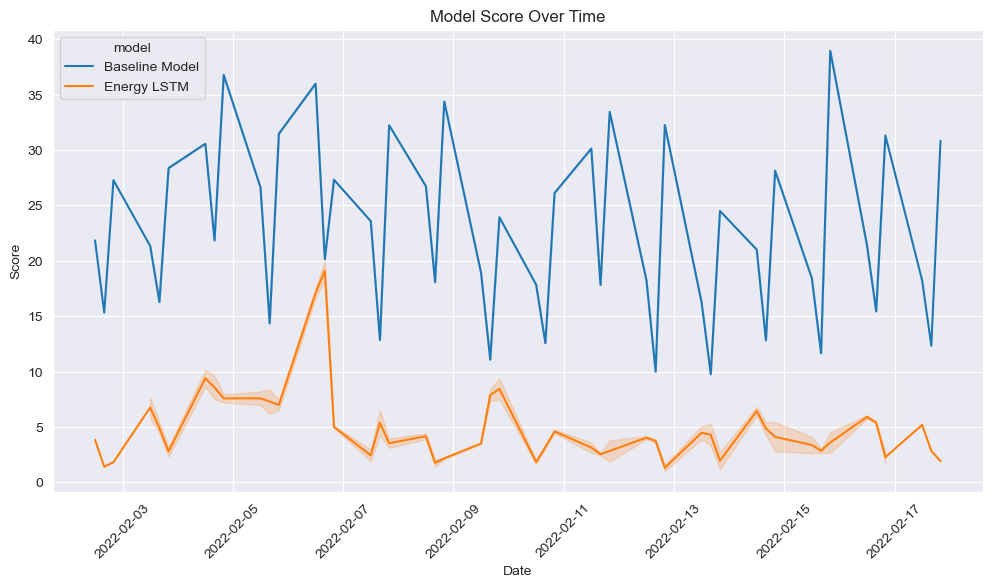

In [5]:
start_date = '2022-02-01'
end_date = '2022-02-15'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_model_revised.evaluate(baseline_model, XGB_model, energy, start_date, end_date, horizon_format="hours")

In [6]:
evaluation_model1

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,58.871450,64.338313,67.069375,70.449875,76.481887,2022-02-02 12:00:00+01:00,75.29250,2,21.844678,Baseline Model
1,2022-02-01,energy,40 hour,56.608094,61.109188,63.621000,69.932375,77.224275,2022-02-02 16:00:00+01:00,71.12125,2,15.320403,Baseline Model
2,2022-02-01,energy,44 hour,52.647250,55.703000,58.693500,62.766688,66.638238,2022-02-02 20:00:00+01:00,68.11000,2,27.278043,Baseline Model
3,2022-02-01,energy,60 hour,53.336875,64.185937,66.551875,70.590625,75.597156,2022-02-03 12:00:00+01:00,74.92050,3,21.343733,Baseline Model
4,2022-02-01,energy,64 hour,52.647975,60.605625,63.577375,69.725625,77.007975,2022-02-03 16:00:00+01:00,71.17800,3,16.283375,Baseline Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-15,energy,40 hour,56.608094,61.109188,63.621000,69.998000,77.224275,2022-02-16 16:00:00+01:00,71.19300,2,15.437215,Baseline Model
2,2022-02-15,energy,44 hour,52.647250,55.703000,58.693500,62.786187,66.638238,2022-02-16 20:00:00+01:00,68.92375,2,31.317543,Baseline Model
3,2022-02-15,energy,60 hour,53.336875,64.185937,66.551875,70.886313,75.597156,2022-02-17 12:00:00+01:00,74.03500,3,18.243702,Baseline Model
4,2022-02-15,energy,64 hour,52.647975,60.605625,63.577375,70.671875,77.007975,2022-02-17 16:00:00+01:00,69.66375,3,12.337500,Baseline Model


In [7]:
evaluation_model2

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,66.341667,73.611046,74.446236,74.228302,75.235657,2022-02-02 12:00:00+01:00,75.29250,2,3.841674,Energy LSTM
1,2022-02-01,energy,40 hour,64.561539,70.379128,71.212013,70.820534,74.447304,2022-02-02 16:00:00+01:00,71.12125,2,1.407187,Energy LSTM
2,2022-02-01,energy,44 hour,64.274254,68.161865,69.412926,68.388664,70.352585,2022-02-02 20:00:00+01:00,68.11000,2,1.823972,Energy LSTM
3,2022-02-01,energy,60 hour,65.448044,71.206062,72.445488,73.031723,75.382225,2022-02-03 12:00:00+01:00,74.92050,3,7.662105,Energy LSTM
4,2022-02-01,energy,64 hour,64.157097,68.313805,69.347115,70.080284,74.593872,2022-02-03 16:00:00+01:00,71.17800,3,5.431396,Energy LSTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-15,energy,40 hour,65.091866,67.337021,69.522644,70.257545,74.583778,2022-02-16 16:00:00+01:00,71.19300,2,5.476123,Energy LSTM
2,2022-02-15,energy,44 hour,65.081551,67.923546,68.198006,68.770340,71.611786,2022-02-16 20:00:00+01:00,68.92375,2,1.782473,Energy LSTM
3,2022-02-15,energy,60 hour,66.945343,71.096214,72.747322,72.728165,76.430573,2022-02-17 12:00:00+01:00,74.03500,3,5.191585,Energy LSTM
4,2022-02-15,energy,64 hour,64.653786,66.389320,69.554337,69.268173,74.579582,2022-02-17 16:00:00+01:00,69.66375,3,2.836283,Energy LSTM


In [8]:
evaluation_model1['score'].sum()

2047.9918625

In [9]:
evaluation_model2['score'].sum()

455.3958997879026